<a href="https://colab.research.google.com/github/vaibhav1595/HR-Analytics-Predict-who-will-change-jobs/blob/main/Predict_who_will_move_to_a_new_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting your Google Drive onto Colab

from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [2]:
# Import Libraries

# Data Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
!pip install squarify
import squarify as sq

plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 200

In [3]:
# Load datasets

train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR Analytics: Job Change of Data Scientists/aug_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR Analytics: Job Change of Data Scientists/aug_test.csv')

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Dealing with missing values

In [5]:
# Check for nulls in train set
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
# Check for nulls in test set
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [7]:
# remove null values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [8]:
print('Null values in Train Set','\n')
print(train.isna().sum(),'\n')

print('Null values in Test Set','\n')
print(test.isna().sum())

Null values in Train Set 

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64 

Null values in Test Set 

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


# Change input values in specific format

In [9]:
# enrolled university column
train['enrolled_university'] = train['enrolled_university'].apply(lambda x: 'No Enrollment' if x == 'no_enrollment' else x)

# experience column
train['experience'] = train['experience'].apply(lambda x: '21' if x == '>20' else x)
train['experience'] = train['experience'].apply(lambda x: '0' if x == '<1' else x)
train['experience'] = train['experience']. astype(int)

# company size column
train['company_size'] = train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)
train['company_size'] = train['company_size'].apply(lambda x: '0-9' if x == '<10' else x)
train['company_size'] = train['company_size'].apply(lambda x: '100-499' if x == '100-500' else x)



In [10]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,No Enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,No Enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,No Enrollment,Graduate,STEM,13,0-9,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [11]:
# enrolled university column
test['enrolled_university'] = test['enrolled_university'].apply(lambda x: 'No Enrollment' if x == 'no_enrollment' else x)

# experience column
test['experience'] = test['experience'].apply(lambda x: '21' if x == '>20' else x)
test['experience'] = test['experience'].apply(lambda x: '0' if x == '<1' else x)
test['experience'] = test['experience'].astype(int)

# company size column
test['company_size'] = test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)
test['company_size'] = test['company_size'].apply(lambda x: '0-9' if x == '<10' else x)
test['company_size'] = test['company_size'].apply(lambda x: '100-499' if x == '100-500' else x)

In [12]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,city_13,0.827,Male,Has relevent experience,No Enrollment,Masters,STEM,11,10-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,21,10000+,Pvt Ltd,>4,72
11,9272,city_90,0.698,Male,Has relevent experience,No Enrollment,Graduate,STEM,20,10-49,Pvt Ltd,2,51
12,14249,city_46,0.762,Male,Has relevent experience,No Enrollment,Graduate,STEM,8,100-499,Other,never,48
16,7865,city_21,0.624,Male,Has relevent experience,No Enrollment,Masters,STEM,4,100-499,Pvt Ltd,1,4


In [13]:
# # Basic Statistics on numeric columns
print('train set\n',train.describe(),'\n')
print('test set\n',test.describe())

train set
         enrollee_id  city_development_index  ...  training_hours       target
count   8955.000000             8955.000000  ...     8955.000000  8955.000000
mean   16869.638749                0.844570  ...       65.074930     0.165606
std     9963.804718                0.116178  ...       60.235087     0.371747
min        2.000000                0.448000  ...        1.000000     0.000000
25%     8150.000000                0.794000  ...       23.000000     0.000000
50%    16924.000000                0.910000  ...       47.000000     0.000000
75%    25902.000000                0.920000  ...       88.000000     0.000000
max    33380.000000                0.949000  ...      336.000000     1.000000

[8 rows x 5 columns] 

test set
         enrollee_id  city_development_index   experience  training_hours
count   1019.000000             1019.000000  1019.000000      1019.00000
mean   16877.823356                0.839644    11.756624        64.88420
std    10022.496322               

In [14]:
# Basic info of Data set
print(train.info(),'\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   int64  
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(3), object(9)
memo

# Exploratory Data Analysis

In [15]:
# Ordering Categorical data as it gives more control over visualization

education_order = ['Primary School','High School','Graduate','Masters','Phd']
enrollment_order = ['No Enrollment','Part time course','Full time course']
major_disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','0-9', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

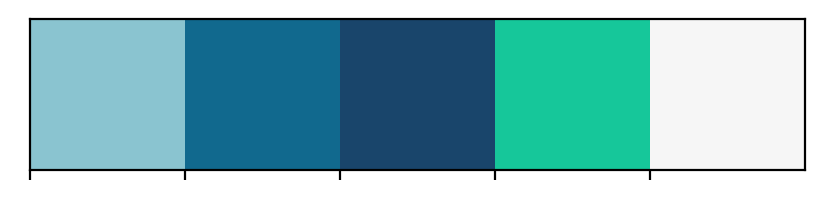

In [16]:
# Color pallete for visuals

sns.palplot(['#8ac4d0','#11698e','#19456b','#16c79a','#f6f6f6'])

# Comparing Train and Test set with each other

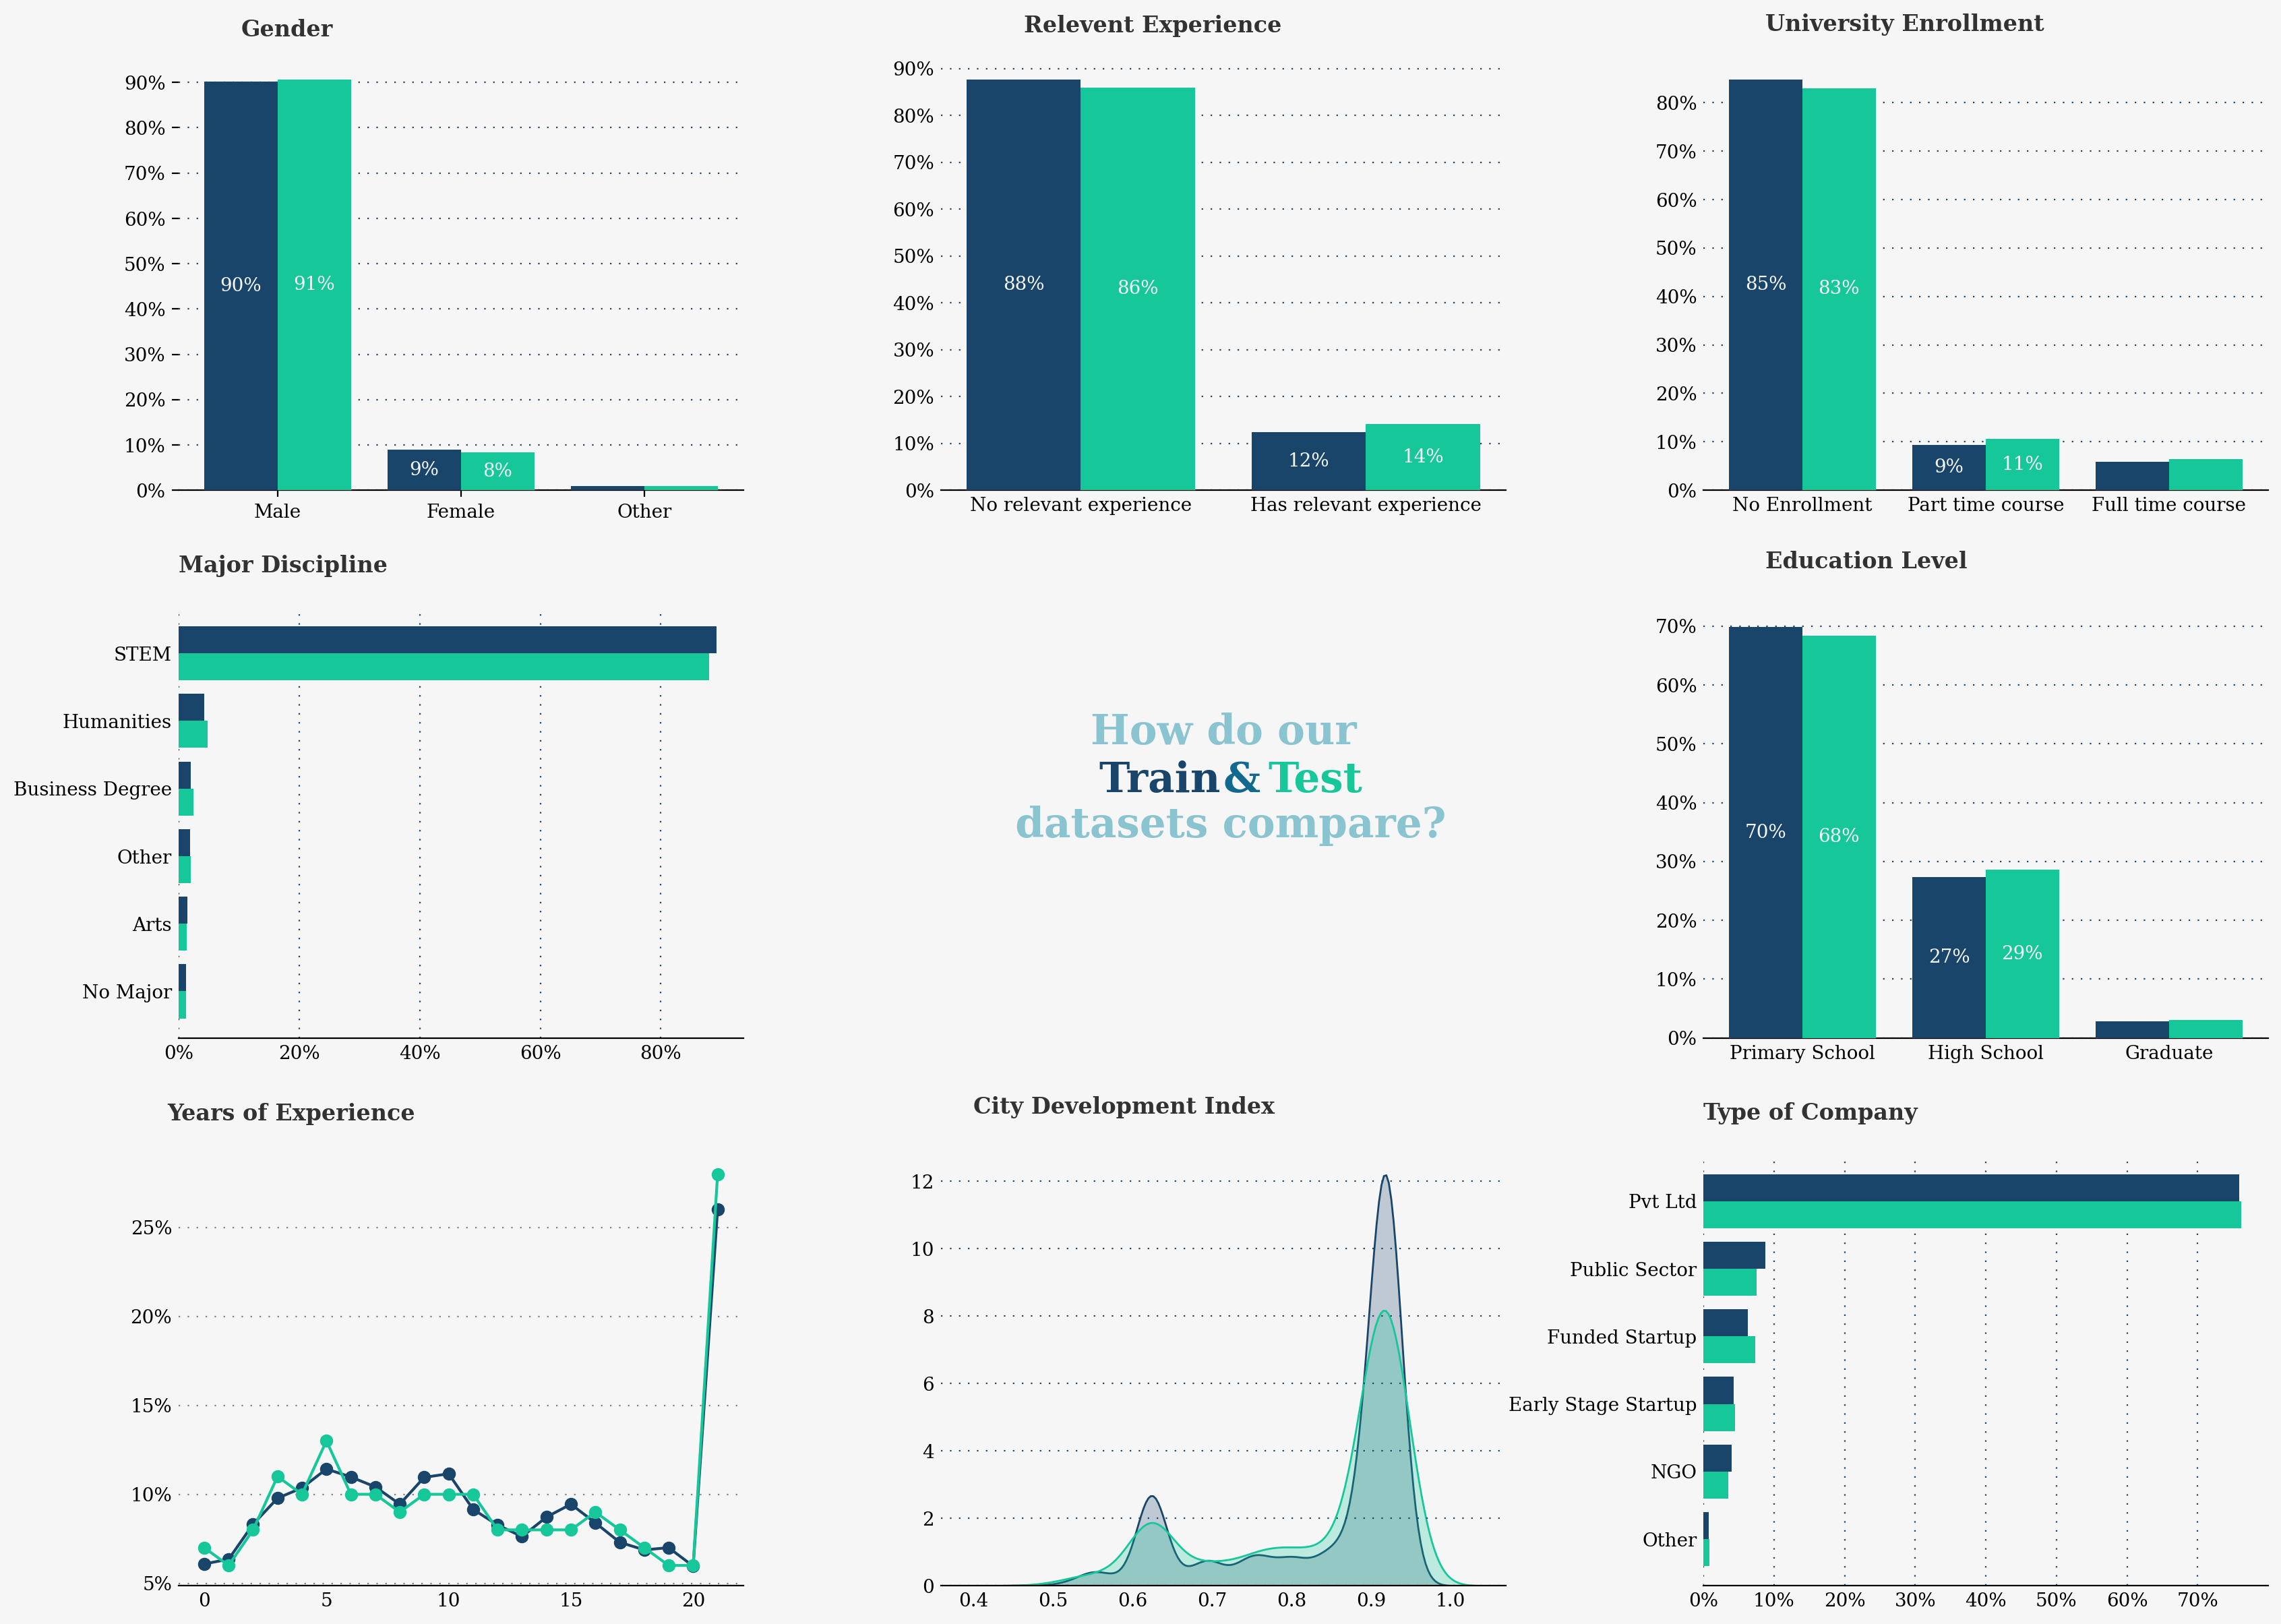

In [17]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0]) # gender
ax1 = fig.add_subplot(gs[0, 1]) # relevent experience
ax2 = fig.add_subplot(gs[0, 2]) # enrolled university
ax3 = fig.add_subplot(gs[1, 0]) # major discipline
ax4 = fig.add_subplot(gs[1, 1]) # title
ax5 = fig.add_subplot(gs[1, 2]) # education level
ax6 = fig.add_subplot(gs[2, 0]) # experience
ax7 = fig.add_subplot(gs[2, 1]) # city development index
ax8 = fig.add_subplot(gs[2, 2]) # company type

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)

# ax0 - gender
train_temp = pd.DataFrame(train['gender'].value_counts())
train_temp['percentage'] = train_temp['gender'].apply(lambda x: 100*x/sum(train_temp['gender']))

test_temp = pd.DataFrame(test['gender'].value_counts())
test_temp['percentage'] = test_temp['gender'].apply(lambda x: 100*x/sum(test_temp['gender']))

x = np.arange(len(train_temp))
ax0.text(0, max(train_temp['percentage'])+10, 'Gender', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=train_temp["percentage"], zorder=3, color="#19456b", width=0.4)
ax0.bar(x+0.4, height=test_temp["percentage"], zorder=3, color="#16c79a", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['Male','Female','Other','Not provided'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_temp["percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_temp["percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# ax1 - relevant experience
train_temp = pd.DataFrame(train['relevent_experience'].value_counts())
train_temp['percentage'] = train_temp['relevent_experience'].apply(lambda x: 100*x/sum(train_temp['relevent_experience']))

test_temp = pd.DataFrame(test['relevent_experience'].value_counts())
test_temp['percentage'] = test_temp['relevent_experience'].apply(lambda x: 100*x/sum(test_temp['relevent_experience']))

x = np.arange(len(train_temp))
ax1.text(0, max(train_temp['percentage'])+10, 'Relevent Experience', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(x, height=train_temp["percentage"], zorder=3, color="#19456b", width=0.4)
ax1.bar(x+0.4, height=test_temp["percentage"], zorder=3, color="#16c79a", width=0.4)
ax1.set_xticks(x + 0.4 / 2)
ax1.set_xticklabels(['No relevant experience','Has relevant experience'])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_temp["percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_temp["percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# ax2 - enrolled university

train_temp = pd.DataFrame(train['enrolled_university'].value_counts())
train_temp['percentage'] = train_temp['enrolled_university'].apply(lambda x: 100*x/sum(train_temp['enrolled_university']))

test_temp = pd.DataFrame(test['enrolled_university'].value_counts())
test_temp['percentage'] = test_temp['enrolled_university'].apply(lambda x: 100*x/sum(test_temp['enrolled_university']))

x = np.arange(len(train_temp))

ax2.text(0, max(train_temp['percentage'])+10, 'University Enrollment', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train_temp["percentage"], zorder=3, color="#19456b", width=0.4)
ax2.bar(x+0.4, height=test_temp["percentage"], zorder=3, color="#16c79a", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(enrollment_order)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_temp["percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_temp["percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# ax3 - major discipline

train_temp = pd.DataFrame(train['major_discipline'].value_counts())
train_temp['percentage'] = train_temp['major_discipline'].apply(lambda x: 100*x/sum(train_temp['major_discipline']))

test_temp = pd.DataFrame(test['major_discipline'].value_counts())
test_temp['percentage'] = test_temp['major_discipline'].apply(lambda x: 100*x/sum(test_temp['major_discipline']))

x = np.arange(len(train_temp))

ax3.grid(color='#19456b', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax3.barh(np.arange(len(train_temp.index)), train_temp["percentage"], zorder=3, color="#19456b", height=0.4)
ax3.barh(np.arange(len(test_temp.index))+0.4, test_temp["percentage"], zorder=3, color="#16c79a", height=0.4)
ax3.text(0, -1, 'Major Discipline', 
         fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax3.xaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax3.set_yticks(np.arange(len(test_temp.index))+0.4 / 2)
ax3.set_yticklabels(list(test_temp.index))
ax3.invert_yaxis()


# ax4 - Title

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#8ac4d0")

ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='#19456b')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#11698e')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#16c79a')

# ax5 - educational level

train_temp = pd.DataFrame(train['education_level'].value_counts())
train_temp['percentage'] = train_temp['education_level'].apply(lambda x: 100*x/sum(train_temp['education_level']))

test_temp = pd.DataFrame(test['education_level'].value_counts())
test_temp['percentage'] = test_temp['education_level'].apply(lambda x: 100*x/sum(test_temp['education_level']))

x = np.arange(len(train_temp))
ax5.text(0, max(train_temp['percentage'])+10, 'Education Level', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=train_temp["percentage"], zorder=3, color="#19456b", width=0.4)
ax5.bar(x+0.4, height=test_temp["percentage"], zorder=3, color="#16c79a", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(education_order)
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_temp["percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_temp["percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# ax6 - experience

train_temp = pd.DataFrame(train["experience"].value_counts())
train_temp["percentage"] = train_temp["experience"].apply(lambda x: x/sum(train_temp["experience"])*100)
train_temp = train_temp.sort_index()
test_temp = pd.DataFrame(test["experience"].value_counts())
test_temp["percentage"] = round(test_temp["experience"].apply(lambda x: x/sum(test_temp["experience"])*100),).astype(int)
test_temp = test_temp.sort_index()
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax6.plot(train_temp.index, train_temp["percentage"], zorder=3, color="#19456b", marker='o')
ax6.plot(test_temp.index, test_temp["percentage"], zorder=3, color="#16c79a", marker='o')
ax6.text(-1.5, 26, 'Years of Experience', 
         fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

ax6.set_yticklabels(labels = ['0%','5%','10%','15%','20%','25%'])
ax6.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax6.yaxis.set_major_locator(mtick.MultipleLocator(5))


# ax7 - city development index

ax7.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_temp = pd.DataFrame(train["city_development_index"])
test_temp = pd.DataFrame(test["city_development_index"])
sns.kdeplot(train_temp["city_development_index"], ax=ax7,color="#19456b", shade=True, label="Train")
sns.kdeplot(test_temp["city_development_index"], ax=ax7, color="#16c79a", shade=True, label="Test")
ax7.text(0.40, 14, 'City Development Index', 
         fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax7.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax7.set_ylabel('')    
ax7.set_xlabel('')

#ax8 - company type

train_temp = pd.DataFrame(train['company_type'].value_counts())
train_temp['percentage'] = train_temp['company_type'].apply(lambda x: 100*x/sum(train_temp['company_type']))

test_temp = pd.DataFrame(test['company_type'].value_counts())
test_temp['percentage'] = test_temp['company_type'].apply(lambda x: 100*x/sum(test_temp['company_type']))

x = np.arange(len(train_temp))

ax8.grid(color='#19456b', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax8.barh(np.arange(len(train_temp.index)), train_temp["percentage"], zorder=3, color="#19456b", height=0.4)
ax8.barh(np.arange(len(test_temp.index))+0.4, test_temp["percentage"], zorder=3, color="#16c79a", height=0.4)
ax8.text(0, -1, 'Type of Company', 
         fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test_temp.index))+0.4 / 2)
ax8.set_yticklabels(list(test_temp.index))
ax8.invert_yaxis()


ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax6.tick_params(axis=u'both', which=u'both',length=0)
ax7.tick_params(axis=u'both', which=u'both',length=0)
ax8.tick_params(axis=u'both', which=u'both',length=0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)



## Explore the data in the Training Set

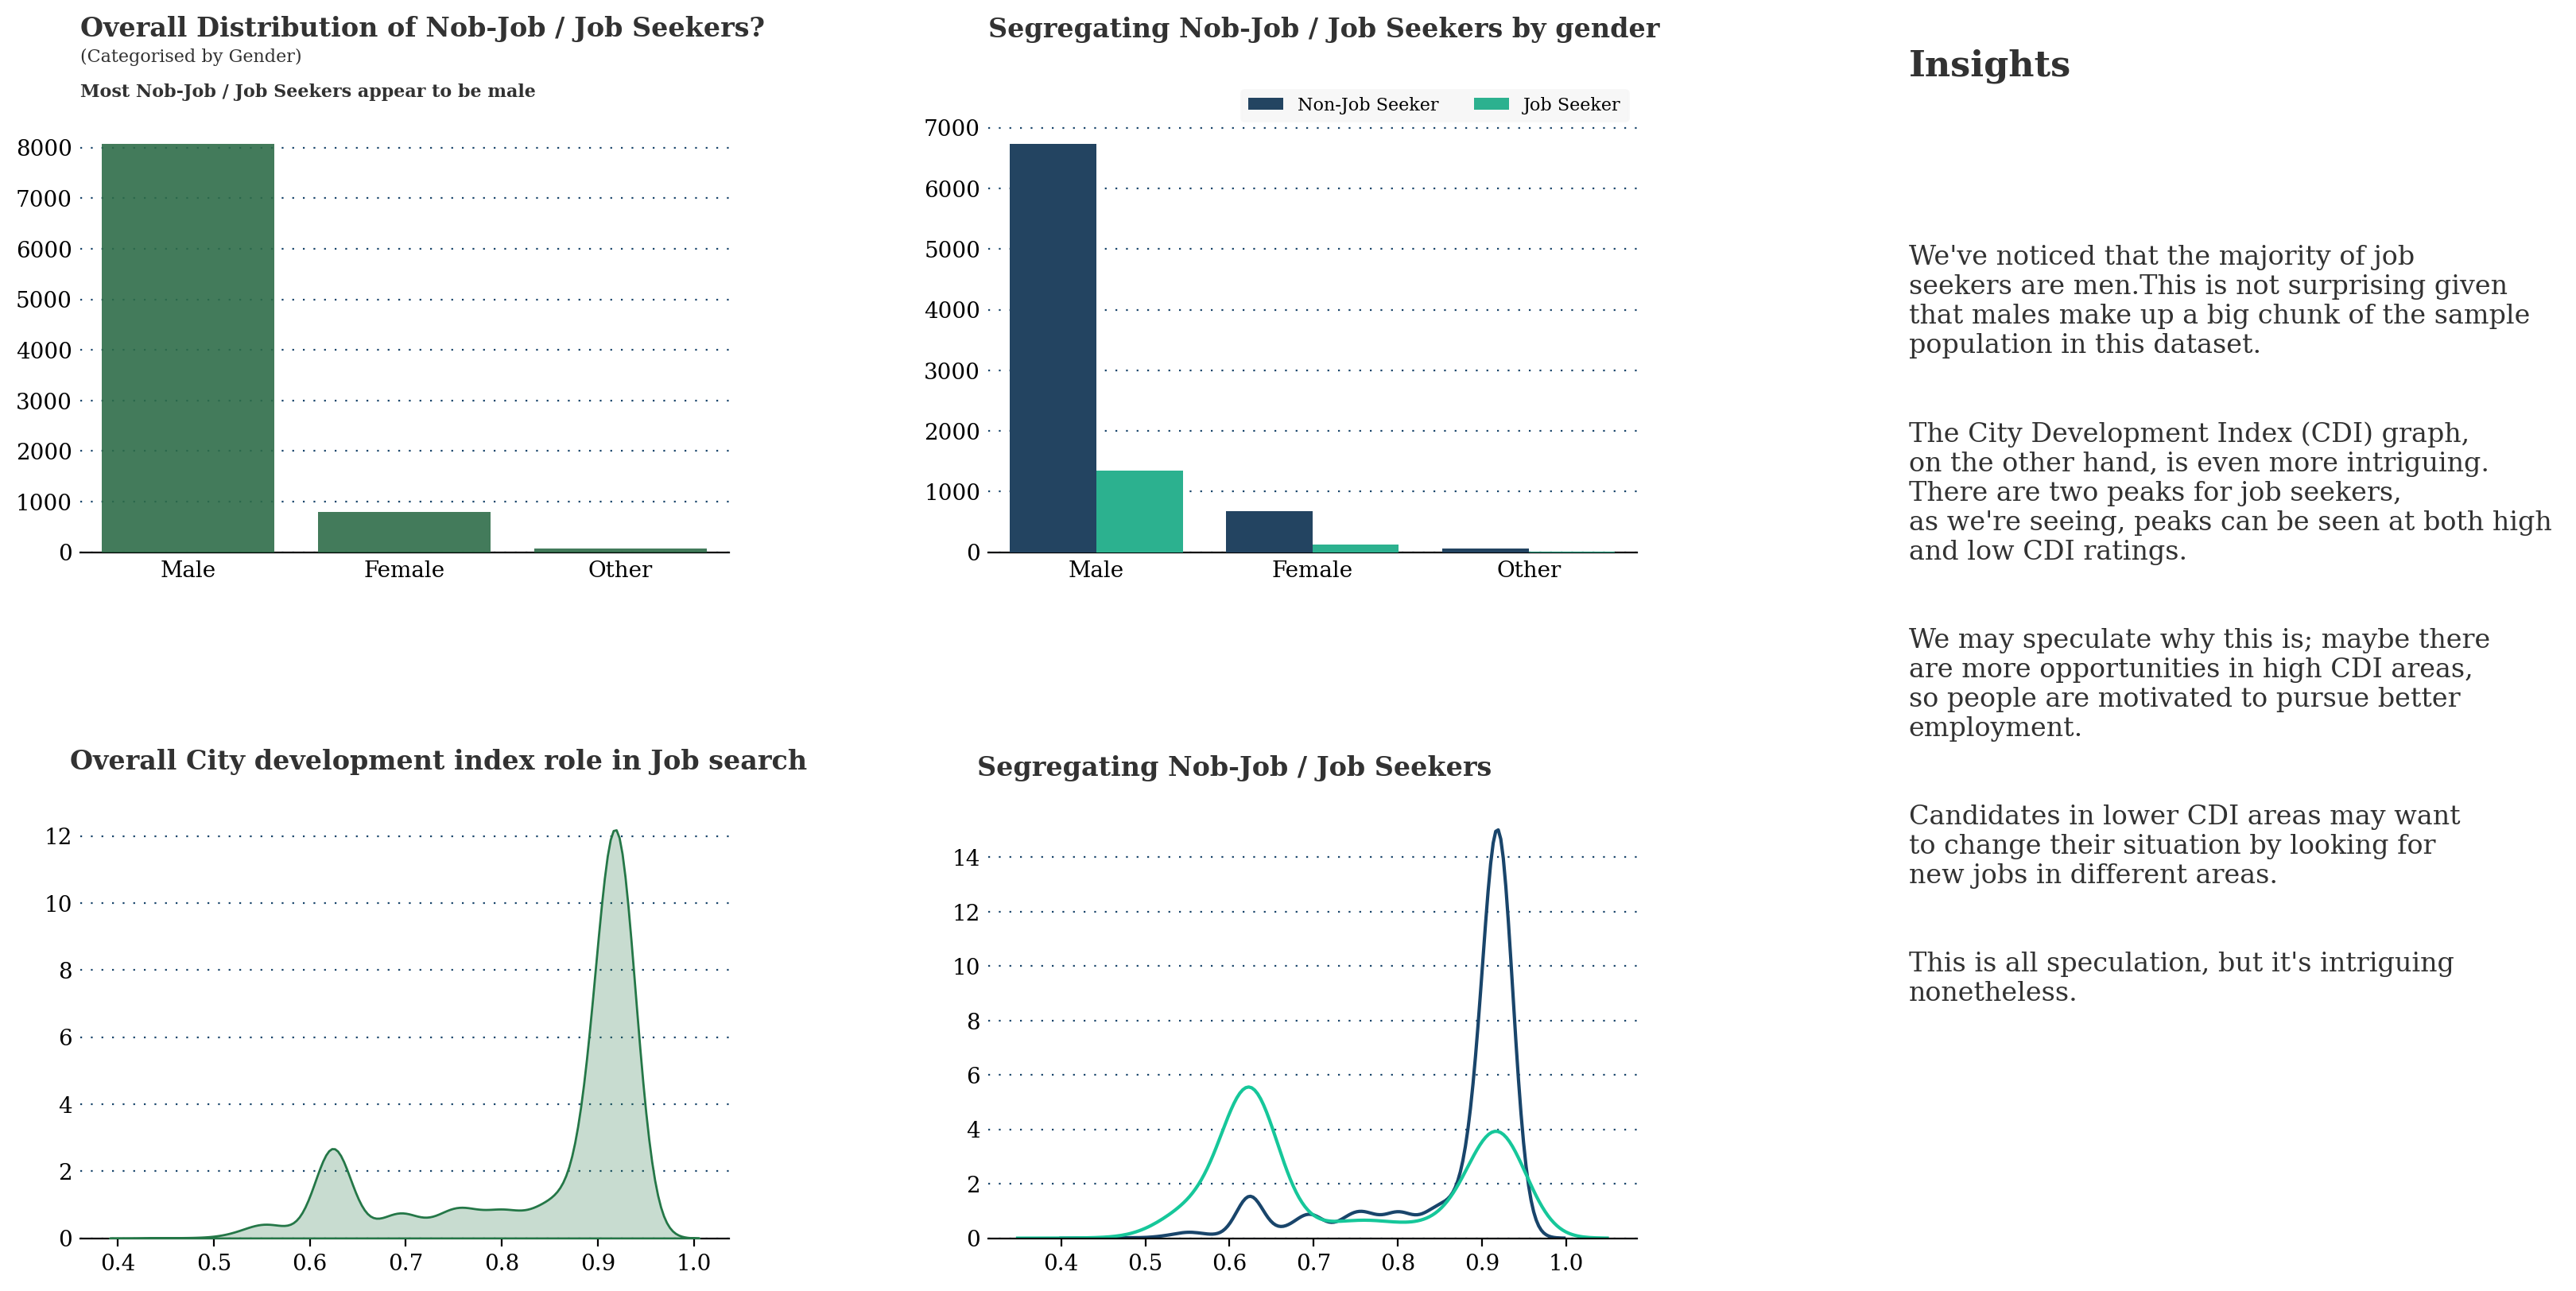

In [18]:
color_palette = ['#19456b','#16c79a']

fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


# Distribution of Nob-Job / Job Seekers

ax0.text(-0.5,10200, 'Overall Distribution of Nob-Job / Job Seekers?', fontsize = 12, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-0.5, 9700, '(Categorised by Gender)', fontsize=8, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-0.5, 9000, 'Most Nob-Job / Job Seekers appear to be male', fontsize=8, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(x=train["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Gender role in distribution of Job Seekers

ax1.text(-0.5, 8500, 'Segregating Nob-Job / Job Seekers by gender', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax1.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(x='gender', hue='target', data=train, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(1, 1.1), facecolor=background_color, edgecolor=background_color,fontsize = 8)
ax1.set_xlabel("")
ax1.set_ylabel("")

# City development index role in Job search
ax2.text(0.35, 14, 'Overall City development index role in Job search', fontsize = 12, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(train['city_development_index'], color="#247747", shade=True, ax=ax2, zorder=3)
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.text(0.3, 17, 'Segregating Nob-Job / Job Seekers', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='#19456b', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(train.loc[(train["target"]==0), "city_development_index"], color="#19456b", label="Not Survived", ax=ax3)
sns.kdeplot(train.loc[(train["target"]==1), "city_development_index"], color="#16c79a", label="Survived", ax=ax3)
ax3.set_xlabel("")
ax3.set_ylabel("")

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'y', which=u'both',length=0)
ax3.tick_params(axis=u'y', which=u'both',length=0)

fig.text(0.7, 0.9, 'Insights', fontsize=16, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.7, 0.5, '''
We've noticed that the majority of job 
seekers are men.This is not surprising given 
that males make up a big chunk of the sample 
population in this dataset.


The City Development Index (CDI) graph, 
on the other hand, is even more intriguing. 
There are two peaks for job seekers, 
as we're seeing, peaks can be seen at both high 
and low CDI ratings.


We may speculate why this is; maybe there 
are more opportunities in high CDI areas, 
so people are motivated to pursue better 
employment.


Candidates in lower CDI areas may want 
to change their situation by looking for 
new jobs in different areas.


This is all speculation, but it's intriguing 
nonetheless.
'''
         , fontsize=12, fontweight='light', fontfamily='serif',color='#323232')

import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.5, 0.5], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

## Let's now explore other factors such as employee experience and company size & company type


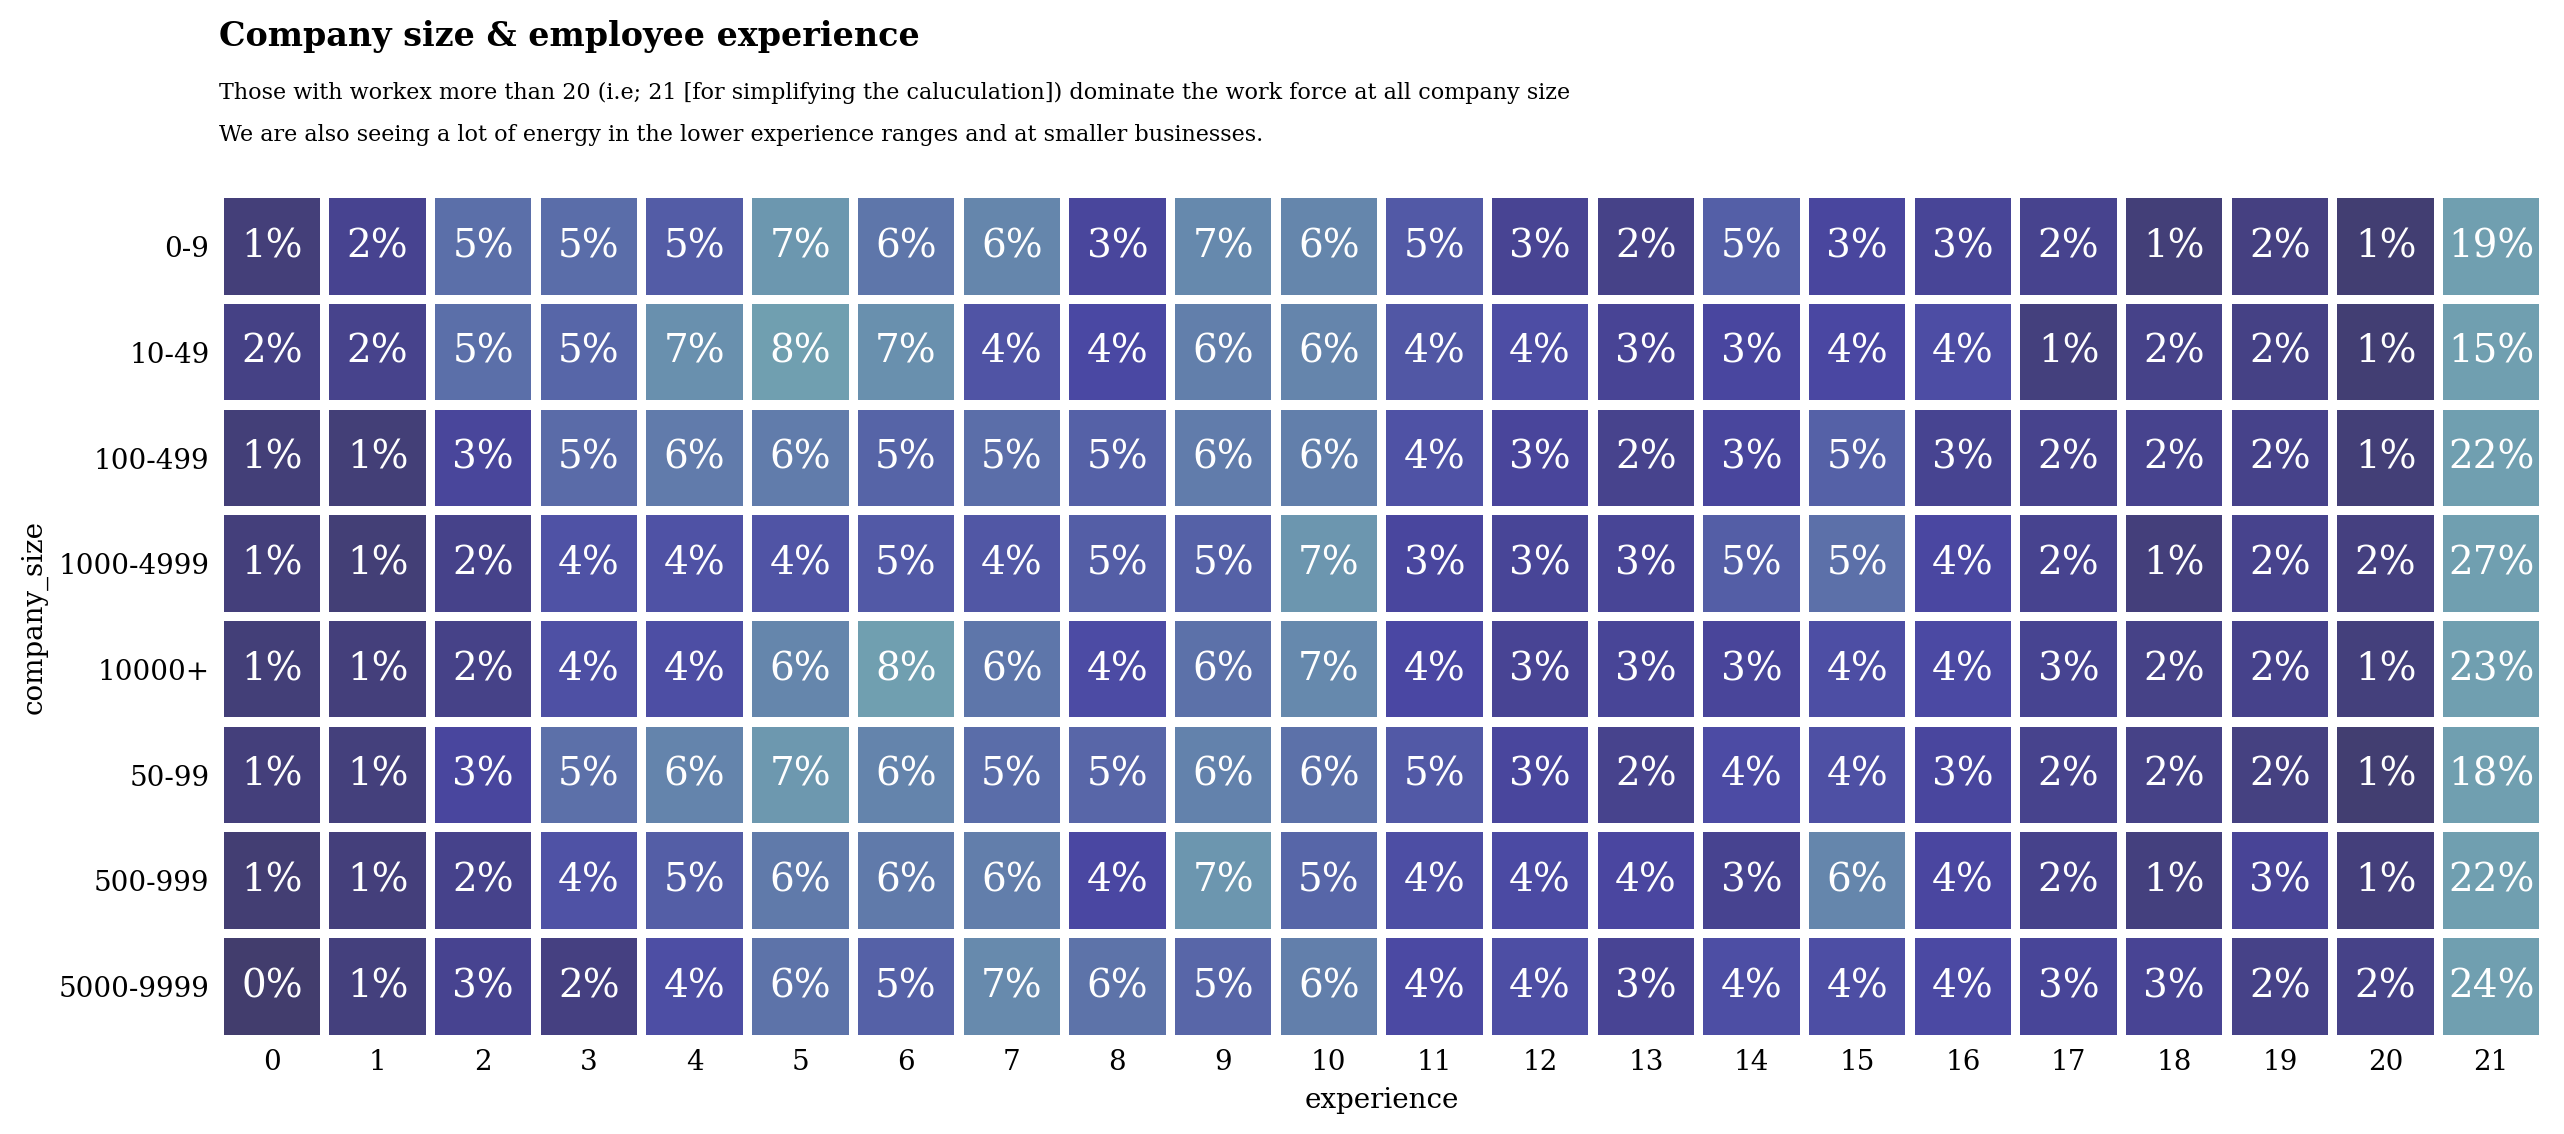

In [19]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[:,:])

train['count'] = 1
pv_gen_size = pd.pivot_table(train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum)
ct_gen_size = pd.crosstab(train['company_size'],train['experience'], normalize='index')

colors = ['#413c69','#4a47a3','#709fb0']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
ax0.text(0, -1.4, 'Company size & employee experience', fontsize=12, fontweight='bold', fontfamily='serif')
ax0.text(0, -0.9, 'Those with workex more than 20 (i.e; 21 [for simplifying the caluculation]) dominate the work force at all company size', fontsize=8, fontweight='light', fontfamily='serif')
ax0.text(0, -0.5, 'We are also seeing a lot of energy in the lower experience ranges and at smaller businesses.', fontsize=8, fontweight='light', fontfamily='serif')

ax0.tick_params(axis=u'both', which=u'both',length=0)